In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from IPython.display import display
import time
from tqdm import tqdm
import random
import math
import timeit
from numba import jit # does not work with pandas
import time
import seaborn as sns
sns.set()

In [2]:
df_train = pd.read_csv("data/training_set_VU_DM.csv")
df_test = pd.read_csv("data/test_set_VU_DM.csv")

In [4]:
train_nans = df_train.isnull().sum()
print(train_nans)
test_nans = df_test.isnull().sum()
print(test_nans)

srch_id                              0
date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance

In [7]:
df_rand = df_train.loc[df_train["random_bool"] == 1]
df_nonrand = df_train.loc[df_train["random_bool"] == 0]

df_booked_r = df_rand.loc[df_rand["booking_bool"] == 1]
df_clicked_r = df_train.loc[df_train["booking_bool"] == 0]
df_clicked_r = df_clicked.loc[df_clicked["click_bool"] == 1]

df_booked = df_booked[["srch_id", "position"]]
df_clicked = df_clicked[["srch_id", "position"]]

In [8]:
book_pos_count = df_booked.groupby("position").count()
click_pos_count = df_clicked.groupby("position").count()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]
[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5]


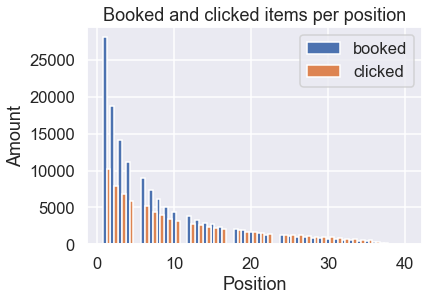

In [13]:
book_range = np.arange(1,len(book_pos_count)+1)
print([i for i in range(1,41)])
click_range = np.arange(1.5,len(click_pos_count)+1)
print([i + .5 for i in range(1,41)])
sns.set_context("talk")
plt.bar(book_range, book_pos_count.iloc[:,0], .5, label="booked")
plt.bar(click_range, click_pos_count.iloc[:,0], .5, label="clicked")
plt.title("Booked and clicked items per position")
plt.xlabel("Position")
plt.ylabel("Amount")
plt.legend()